## Step 1: Generating cars dataset

This block of Python code will generate the sample data for you. You will not be generating the dataset using numpy module this week. Instead, the dataset will be imported from a CSV file. To make the data unique to you, a random sample of size 30, without replacement, will be drawn from the data in the CSV file. The data set will be saved into a Python dataframe which you will use in later calculations.

In [1]:
import pandas as pd
from IPython.display import display, HTML

# read data from mtcars.csv data set.
cars_df_orig = pd.read_csv("https://s3-us-west-2.amazonaws.com/data-analytics.zybooks.com/mtcars.csv")

# randomly pick 30 observations without replacement from mtcars dataset to make the data unique to you.
cars_df = cars_df_orig.sample(n=30, replace=False)

# print only the first five observations in the data set.
print("\nCars data frame (showing only the first five observations)")
display(HTML(cars_df.head().to_html()))


Cars data frame (showing only the first five observations)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4


## Step 2: Scatterplot of miles per gallon against weight

The block of code below will create a scatterplot of miles per gallon (coded as mpg in the data set) and weight of the car (coded as wt).

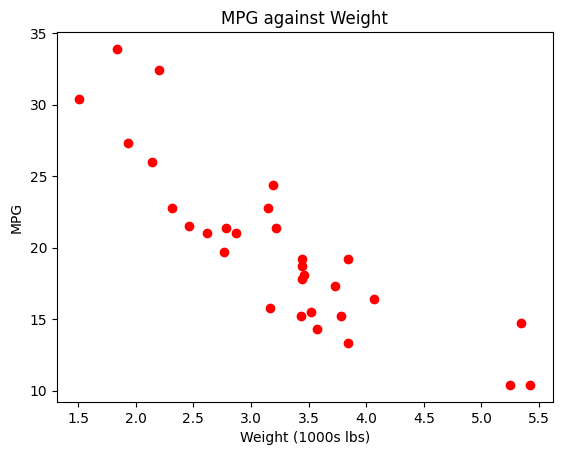

In [2]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against wt.
plt.plot(cars_df["wt"], cars_df["mpg"], 'o', color='red')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Weight')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')

# show the plot.
plt.show()

## Step 3: Correlation coefficient for miles per gallon and weight

Now you will calculate the correlation coefficient between the miles per gallon and weight variables. The corr method of a dataframe returns the correlation matrix with correlation coefficients between all variables in the dataframe. In this case, you will specify to only return the matrix for the variables "miles per gallon" and "weight".

In [3]:
# create correlation matrix for mpg and wt.
# the correlation coefficient between mpg and wt is contained in the cell for mpg row and wt column (or wt row and mpg column)
mpg_wt_corr = cars_df[['mpg','wt']].corr()
print(mpg_wt_corr)

          mpg        wt
mpg  1.000000 -0.856591
wt  -0.856591  1.000000


## Step 4: Simple linear regression model to predict miles per gallon using weight

The block of code below produces a simple linear regression model using "miles per gallon" as the response variable and "weight" (of the car) as a predictor variable. The ols method in statsmodels.formula.api submodule returns all statistics for this simple linear regression model.

In [5]:
from statsmodels.formula.api import ols

# create the simple linear regression model with mpg as the response variable and weight as the predictor variable
model = ols('mpg ~ wt', data=cars_df).fit()

#print the model summary
print(model.summary())

# To find the simple linear regression equation, we need to find the intercept and the slope of the regression line.
intercept = model.params['Intercept']
slope = model.params['wt']
print(f"\nSimple linear regression equation: mpg = {intercept:.2f} + {slope:.2f} * wt")


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     77.16
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.55e-09
Time:                        22:16:30   Log-Likelihood:                -75.211
No. Observations:                  30   AIC:                             154.4
Df Residuals:                      28   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8658      2.009     18.347      0.0

## Step 5: Slope Coefficient

What is the slope coefficient? Is the coefficient significant at a 0.05 level?

To find the slope coefficient, you will need to look at the coefficient for the weight variable in the regression model summary. The p-value for the coefficient is also provided in the summary. If the p-value is less than 0.05, then the coefficient is significant at the 0.05 level.

